# start2impact University | Progetto Advanced Analytics

Ti diamo il benvenuto nel notebook del progetto del Corso Advanced Analytics!

Prima di tutto bisogna importare una serie di librerie core, che saranno quelle principali per rispondere alle domande del progetto:

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

Per usare il tuo Google Drive con Colab, bisogna montarlo tramite il seguente comando. Dovrebbe chiederti l'accesso tramite il tuo account Google, concediglielo e seleziona tutte le spunte disponibili.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# Ricarica il file salvato
dataset = pd.read_csv('/content/drive/My Drive/supermarket_sales_originale.csv')


Mounted at /content/drive


Dopodiché puoi partire con l'importazione del dataset **supermarket sales**, il primo che ti servirà: dovresti averlo già uploadato nel tuo Drive, inserisci la location dove lo hai salvato andando a sostituire il placeholder *{PATH_AL_FILE_SUL_TUO_DRIVE}*, così da importarlo nell'ambiente di lavoro:

In [ ]:

regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/supermarket_sales_originale.csv', encoding='windows-1254')


# Esplorazione del dataset

**In questa breve sezione andrai a visualizzare il dataset in forma tabellare**, così da averne una rappresentazione più intuitiva e comprendere meglio con che tipologia di dato hai a che fare. Per semplicità si mostrano solo le prime 100 occorrenze.

In [ ]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Vai quindi a vedere più nel dettaglio quali sono i metadati principali delle colonne del dataset:

In [ ]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Da questo puoi già vedere che non ci sono valori nulli, per cui non dovrai usare nessuna strategia per fillarli, altri valori invece sono categorici e quindi bisognerà usare una strategia per codificarli; insomma hai già un po' di informazioni di massima sul dato!
Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno semplicemente eliminate, come per esempio l'ID della fattura, la data della vendita, l'orario e un altro paio:

In [ ]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])
regression_dataset.to_csv('/content/drive/MyDrive/supermarket_sales_originale.csv', index=False)  #salvataggio delle modifiche

Puoi quindi vedere che alcune colonne sono state rimosse e adesso hai solo quelle che effettivamente sono utili ai fini dello sviluppo del modello:

In [ ]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


# Media, mediana, moda e deviazione standard

Si parte con un esercizio molto semplice, in cui ti chiedo di **calcolare usando numpy la media, la mediana e la moda della colonna su cui andrai a fare predizioni (la label), ovvero Rating**. La colonna "Rating" dà una valutazione alla transazione in base alla redditività della stessa e quindi ti dice quanto è stata proficua la stessa per la catena di supermercati.
Questo ti darà una prima idea di sintesi sui rating assegnati ai vari ordini:

In [ ]:
import numpy as np
import scipy.stats as stats

rating = regression_dataset['Rating']

media = np.mean(rating)
mediana = np.median(rating)
moda = stats.mode(rating)


print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")


Media: 6.9727
Mediana: 7.0
Moda: ModeResult(mode=6.0, count=26)


Come hai visto durante il Corso, la **deviazione** è una importantissima misura di "sparsità" dei dati, ed è una informazione che è molto utile da ottenere sulla label. Ti chiedo quindi di calcolarla, sempre usando Numpy:

In [ ]:
deviazione_standard = np.std(rating)
print(f"Deviazione standard: {deviazione_standard}")

Deviazione standard: 1.7177207893019182


# Come sono distribuiti i valori della label

A questo punto andiamo a vedere come sono graficamente distribuiti i dati:

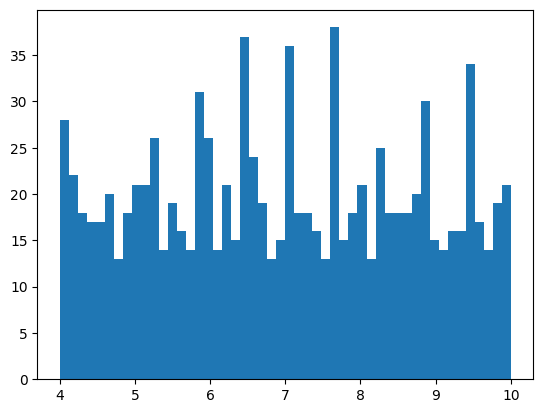

In [ ]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

Come puoi vedere, la distribuzione dei rating è più o meno uniforme e non c'è skewness.

Il discorso è invece diverso per l'utile lordo:

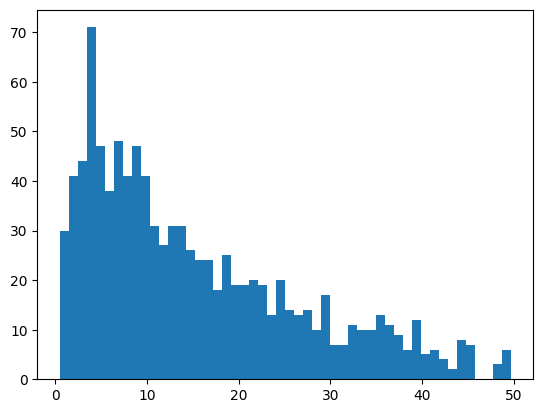

In [ ]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

Come puoi vedere, qui la skewness c'è eccome e la maggioranza degli ordini sembra avere un income lordo basso.
Qual è, quindi, il valore di questa skewness esattamente? Tocca a te scoprirlo nella prossima cella!

Un piccolo consiglio: farlo con Numpy non è il modo più semplice!

In [ ]:
import numpy as np
from scipy.stats import skew


dati = regression_dataset['gross income']

skewness = skew(dati)

# Stampare il risultato
print("Skewness:", skewness)

# in realtà mi è venuto più immediato calcolarla con numpy in aggiunta alla libreria skew






Skewness: 0.8912303920037635


# Encoding delle variabili categoriche

Come avrai sicuramente notato, ci sono delle variabili (come "Branch", "City", "Customer type", "Gender", "Product line" e "Payment") che non sono numeriche e che quindi non possono essere direttamente masticate dagli algoritmi che andrai a utilizzare più tardi.
Ricordi le **tecniche per effettuarne l'enconding**? Questo è il momento di usarle per trasformarle in vettori!

In [ ]:
regression_dataset = pd.get_dummies(regression_dataset, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'])


regression_dataset.to_csv('/content/drive/MyDrive/supermarket_sale_originale.csv', index=False)

# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono sicuramente il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che come hai visto ha una grossa skewness. Questo dovrebbe migliorare la performance dei modelli che andrai a costruire a brevissimo, per cui ti chiedo di procedere in tal senso con la **standardizzazione**:

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

regression_dataset[['Unit price_standard', 'gross income_standard']] = scaler_standard.fit_transform(
    regression_dataset[['Unit price', 'gross income']] )



regression_dataset[['Unit price_normalized', 'gross income_normalized']] = scaler_minmax.fit_transform(
    regression_dataset[['Unit price', 'gross income']] )


# Salvataggio il DataFrame modificato
regression_dataset.to_csv('/content/drive/MyDrive/supermarket_sales_originale.csv', index=False)

print(regression_dataset[['Unit price', 'gross income', 'Unit price_standard', 'gross income_standard', 'Unit price_normalized', 'gross income_normalized']].head())

   Unit price  gross income  Unit price_standard  gross income_standard  \
0       74.69       26.1415             0.718160               0.919607   
1       15.28        3.8200            -1.525303              -0.987730   
2       46.33       16.2155            -0.352781               0.071446   
3       58.22       23.2880             0.096214               0.675780   
4       86.31       30.2085             1.156959               1.267125   

   Unit price_normalized  gross income_normalized  
0               0.718847                 0.521616  
1               0.057855                 0.067387  
2               0.403316                 0.319628  
3               0.535603                 0.463549  
4               0.848131                 0.604377  


# Train e Test Split

Bene, è quindi giunta l'ora di affrontare l'ultima fase prima di allenare un modello di machine learning: l**o split fra training e test set**!
Per un primo approccio ti suggeriamo di usare una ratio 80:20 o 70:30, che il più delle volte funzionano bene.

Ti chiediamo di chiamare le feature di train, le feature di test, la label di train e le label di test rispettivamente con i nomi *X_train*, *X_test*, *y_train* e *y_test*:

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

 #Corrected file path to match the saving path in previous steps
 #Make sure this file path exactly matches where you saved it previously
regression_dataset = pd.read_csv('/content/drive/MyDrive/supermarket_sales_originale.csv')


 #Separazione target (rating) e feature
X = regression_dataset.drop(columns=['Rating'])
y = regression_dataset['Rating']

#(Optional) Save the DataFrame again (if needed)
regression_dataset.to_csv('/content/drive/MyDrive/supermarket_sales_originale.csv', index=False)

#Divisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Linear Regression

Ora è giunto il momento di predire i **Rating** usando il modello più semplice che hai visto, ovvero la linear regression!
Ti chiediamo di chiamare il modello *regressor*.

Procedi pure nella cella che segue:

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividi il dataset in X (features) e y (target)
#X = regression_dataset.drop(columns=['rating'])  # Escludi la colonna 'rating'
#y = regression_dataset['rating']  # La colonna 'rating' è il target

# Suddividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Crea un'istanza del modello di regressione lineare
regressor = LinearRegression()

# Addestra il modello
regressor.fit(X_train, y_train)

# Fai previsioni sul test set
y_pred = regressor.predict(X_test)

Adesso che il training è avvenuto è il momento di valutare come questo performa. Le metriche che prendiamo in considerazione, che sono le principali per la regressione lineare, sono **il mean squadred error e il mean absolute error**. Ti chiediamo di calcolarle (sempre usando sklearn), avendo cura di chiamarle rispettivamente *MSE* e *MAE*. Punta a renderle il più vicine allo zero possibile, perché il modello è più di qualità quanto più queste sono zero:

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)


print('MSE =', MSE, '\nMAE =', MAE)

# nel train test split test avevo scritto un codice in cui ho provato i 'random state' più usati : 0 , 42 e 100
# ed è risultato che i valori più vicini allo zero sono col 100

MSE = 2.881908193598902 
MAE = 1.4498066732430863


# Polynomial Regression

Prova in questa sezione a lavorare in modo simile a quanto fatto per la linear regression, ma usando la polynomial regression, che è sicuramente più potente della prima.

Come prima, ti chiediamo di chiamare *regressor* il modello e *poly_regressor* l'oggetto relativo alle feature polinomiali:

In [ ]:

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')


regression_dataset = pd.read_csv('/content/drive/MyDrive/supermarket_sales_originale.csv', encoding='windows-1254')


X = regression_dataset.drop(columns=['Rating'])
y = regression_dataset['Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


regressor = LinearRegression()


regressor.fit(X_train_poly, y_train)

y_pred = regressor.predict(X_test_poly)








Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

In [ ]:
#No, l'MSE e il MAE sono più elevati

from sklearn.metrics import mean_squared_error, mean_absolute_error


y_pred = regressor.predict(X_test_poly)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)





print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.3775302703857424 
MAE = 1.53951171875


# Logistic Regression

In questa sezione si cambia dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui andrai a valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

La prima cosa è da fare è** importare il nuovo dataset**, ovvero apple_quality, che questa volta ti chiediamo di fare in autonomia, chiamando il dataset *classification_dataset*:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

apple_quality = pd.read_csv('/content/drive/MyDrive/apple_quality.csv')

Mounted at /content/drive


Ti suggeriamo quindi  di printare le prime 50 righe...

In [ ]:
apple_quality.head(50)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


... e dei metadati delle colonne:

In [ ]:
apple_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Come puoi vedere, il dataset è già pulito e quasi tutte le colonne sono numeriche. L'unica a non esserlo è proprio la label, che va encodata:

In [ ]:
"""
apple_quality.tail()

apple_quality = apple_quality.drop(apple_quality.index[-1])

apple_quality.reset_index(drop=True, inplace=True)
"""
# ho eliminato l'ultima riga in quanto conteneva valori nulli o non utili ai fini dell'analisi

#apple_quality['Acidity'] = apple_quality['Acidity'].astype(float)  #ho convertito questa colonna da object a float
apple_quality = pd.get_dummies(apple_quality, columns=['Quality'])
apple_quality[['Quality_good' , 'Quality_bad']]


Bisogna poi ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [ ]:
from sklearn.model_selection import train_test_split


X = apple_quality.drop(columns=['Quality_good', 'Quality_bad'])
y = apple_quality['Quality_good']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Puoi finalmente usare la logistic regression per allenare il modello vero e proprio, che ti chiedo di chiamare *logistic_regressor*:

In [ ]:
from sklearn.linear_model import LogisticRegression


logistic_regressor = LogisticRegression()


logistic_regressor.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Una metrica che ti permette subito di valutare la bontà del modello, come saprai, è l'***F1 score***, che dovrebbe essere idealmente superiore a 0.80. Cerca anche di massimizzare la media della precision e del recall, che idealmente dovrebbero anch'essi essere superiori a 0.80:

In [ ]:
from sklearn.metrics import classification_report

y_predict_test = logistic_regressor.predict(X_test)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

       False       0.74      0.79      0.76       401
        True       0.77      0.72      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



Ora è intessante andare a "disegnare" la **confusion matrix**, che ti mostra quali sono le categorie su cui il modello che hai costruito è "bravo" e su quali no, così da eventualmente avere delle informazioni in più per migliorarlo. Prova a farlo in autonomia usando scikit-learn:

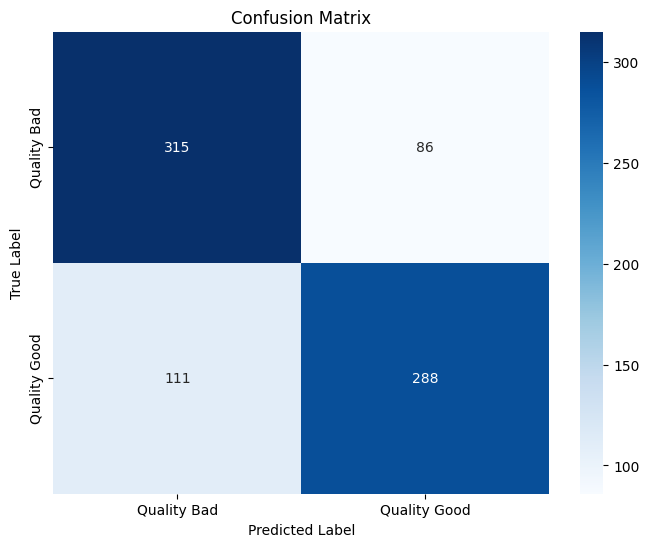

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = logistic_regressor.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Quality Bad', 'Quality Good'], yticklabels=['Quality Bad', 'Quality Good'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Decision Tree

**Puoi provare a usare un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.** Generalmente, come visto durante la parte teorica del Corso, i decision tree sono più potenti, ma scoprilo costruendone uno!

Il procedimento non è dissimile da quelli usati in precedenza, quindi procedi pure al training:

In [ ]:
from sklearn.tree import DecisionTreeClassifier


decision_tree_model = DecisionTreeClassifier(random_state=42)


decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

E poi alla costruzione della confusion matrix:

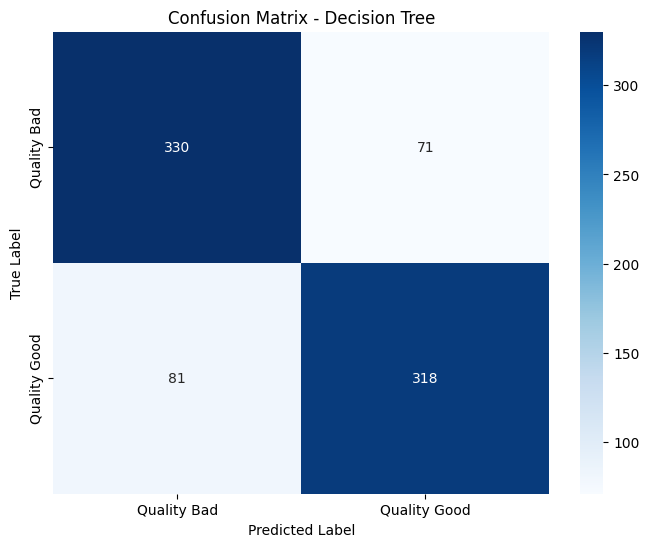

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Effettuare le previsioni sul set di test con il modello di Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)

# Calcolare la matrice di confusione
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Visualizzare la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Quality Bad', 'Quality Good'], yticklabels=['Quality Bad', 'Quality Good'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Quanti sono gli errori? Di più o di meno di quelli commessi dal modello con la logistic regression?

Quali sono le feature che sono state più importanti per il decision tree che hai costruito? Scoprilo con la feature importance, che ti invitiamo a calcolare e poi a printare nella cella che segue:

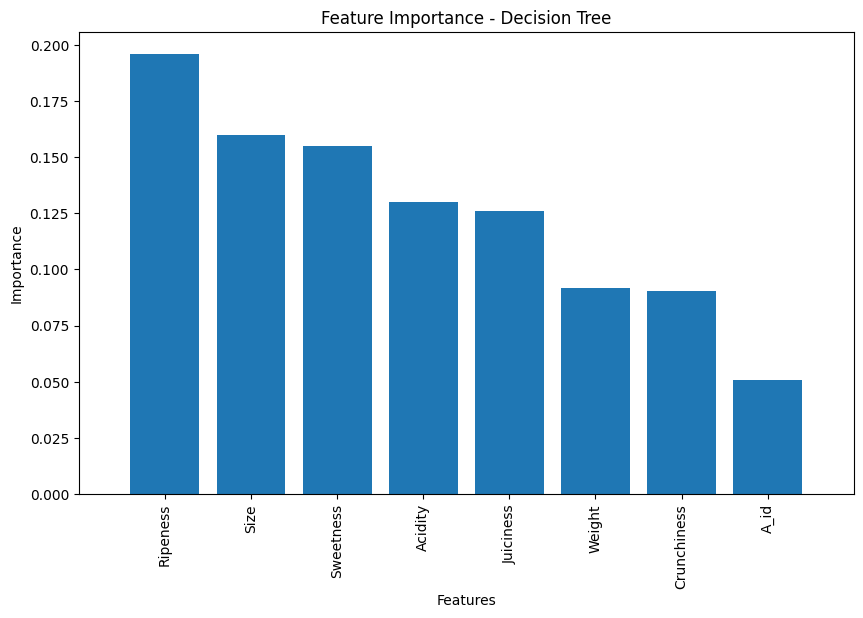

In [ ]:
# Il decision tree si è dimostrato un modello più efficente commetendo 157 errori a fronte dei 197 della logistic regression

import numpy as np
import matplotlib.pyplot as plt


importances = decision_tree_model.feature_importances_


indices = np.argsort(importances)[::-1]

# grafico delle importanze delle caratteristiche
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Decision Tree")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


# K-Means Clustering

Eccoci al K-Means Clustering, il più utilizzato algoritimo tra quelli non supervisionati.

Per prima cosa bisogna eliminare la label perché, come sai, il K-Means Clustering è un algoritmo non supervisionato e non deve quindi averla:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
apple_quality = pd.read_csv('/content/drive/My Drive/apple_quality.csv')
apple_quality = apple_quality.drop(apple_quality.index[-1])

apple_quality.reset_index(drop=True, inplace=True)

apple_quality['Acidity'] = apple_quality['Acidity'].astype(float)

#apple_quality = apple_quality.drop(columns= ['Quality'])
apple_quality.to_csv('/content/drive/MyDrive/apple_quality.csv', index=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prova a trainare il modello usando l'algoritmo in oggetto, il procedimento è sempre simile a quanto visto in precedenza. Prova a settare dapprima il numero dei cluster a due (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




scaler = StandardScaler()
X_scaled = scaler.fit_transform(apple_quality)


kmeans = KMeans(n_clusters=2, random_state=42)


kmeans.fit(X_scaled)


apple_quality['Cluster'] = kmeans.labels_


print(apple_quality[['Cluster']].head(50))





    Cluster
0         0
1         0
2         1
3         1
4         1
5         0
6         1
7         0
8         0
9         1
10        0
11        1
12        1
13        1
14        1
15        0
16        0
17        1
18        1
19        1
20        0
21        1
22        1
23        1
24        1
25        0
26        0
27        1
28        1
29        1
30        0
31        0
32        1
33        1
34        1
35        0
36        0
37        1
38        0
39        1
40        1
41        1
42        0
43        1
44        1
45        1
46        0
47        1
48        0
49        1


Effettua quindi una predizione e vedi a che qualità corrisponde la mela che hai dato in input al modello:

In [ ]:
# mela con delle caratteristiche inventate in riferimento a 'Size'	'Weight'	'Sweetness'	'Crunchiness'	'Juiciness'	'Ripeness' e	'Acidity'
mela_random = [[1.331606, -2.839257, 0.875974, -1.012009, 3.413761, 1.914616, -1.470125066, 1.5608 ]]


try:
    cluster_prediction = kmeans.predict(mela_random)
    print(f"La mela è stata assegnata al cluster: {cluster_prediction[0]}")

    # Interpreta il risultato
    if cluster_prediction[0] == 0:
        print("Questa mela è di buona qualità.")
    else:
        print("Questa mela è di cattiva qualità.")
except ValueError as e:
    print("Errore:", e)
    print("Assicurati che il numero di feature del nuovo esempio corrisponda a quello utilizzato per addestrare il modello.")


La mela è stata assegnata al cluster: 1
Questa mela è di cattiva qualità.


A che cluster è stata assegnata la mela, è buona o cattiva?
Che succede se invece provi a settare il numero di cluster a tre? Testa questo scenario e rifai la predizione, magari potresti scoprire che in realtà ci sono anche delle mele di qualità intermedia!

# Time Series

L'ultimo tema del progetto è quello delle time series: se ci hai fatto caso, il dataset che hai utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case. Adesso è tempo di riprenderla!
In questo scenario vogliamo provare a **capire come i gross income evolvono nel tempo**, quindi prendi il dataset originale, ovvero *regression_raw_dataset* ed elimina tutte le colonne, tenendo solo "Date" e "gross income" e avendo cura di chiamare *timeseries_dataset* il nuovo dataset:

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')


file_path = '//content/drive//MyDrive//supermarket_sales_dropped.csv'


timeseries_dataset = pd.read_csv(file_path)

timeseries_dataset = timeseries_dataset[['Date', 'gross income']]
timeseries_dataset.to_csv('/content/drive/MyDrive/supermarket_sales_dropped.csv', index=False) #salvataggio del dataset modificato



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

In [ ]:

#dopo alcuni rimaneggiamenti ho convertito la colonna 'Date' da object a datetime
from google.colab import drive
drive.mount('/content/drive')

timeseries_dataset = pd.read_csv('/content/drive/MyDrive/supermarket_sales_dropped.csv')
timeseries_dataset['Date'] = pd.to_datetime(timeseries_dataset['Date'])
timeseries_dataset = timeseries_dataset.drop(columns=['level_0' , 'index'])
timeseries_dataset.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1000 non-null   datetime64[ns]
 1   gross income  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


A questo punto prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

In [ ]:


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


timeseries_dataset = timeseries_dataset.sort_values(by='Date')


timeseries_dataset['Days'] = (timeseries_dataset['Date'] - timeseries_dataset['Date'].min()).dt.days


X = timeseries_dataset[['Days']]
y = timeseries_dataset['gross income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)















E vai a controllare le solite metriche, cioè MSE ed MAE:

In [ ]:

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('MSE =', MSE, '\nMAE =', MAE)



MSE = 133.65237456139502 
MAE = 9.55081098670277


Ti renderai conto che probabilmente non sono così elevati come in precedenza, questo perché la regressione lineare sulle time series spesso fallisce e, come già visto nella teoria, c'è bisogno di altri modelli più perfomanti.

# Time Series con XGBoost (opzionale)

A proposito di modelli più performanti per le time series, ricordi XGBoost? Se ti va, puoi provare a impiegare quest'ultimo per costruire il modello. **Questa sezione è opzionale e non necessaria per superare il progetto.**

In [ ]:
# (BONUS) training e performance evalutation della time series con XGBoost